In [1]:
import pandas as pd

In [20]:
train_df = pd.read_csv('big_data/train.csv')
train_df.head()
train_df.shape
test_df = pd.read_csv('big_data/test.csv')

# [Problem 1] Feature selection for practice

In [7]:
selected_cols = ["GrLivArea", "YearBuilt", "SalePrice"]
train_df[selected_cols].head()

,GrLivArea,YearBuilt,SalePrice
0,1710,2003,208500
1,1262,1976,181500
2,1786,2001,223500
3,1717,1915,140000
4,2198,2000,250000


# [Problem 2] Estimation and evaluation by linear regression

In [8]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [10]:
X = train_df[["GrLivArea", "YearBuilt"]].values
Y = train_df[["SalePrice"]].values
linear_model = LinearRegression().fit(X, Y)

In [12]:
import numpy as np
pred = linear_model.predict(X)
mse_score = np.round(mean_squared_error(Y, pred), 2)
print(f"MSE = {mse_score}")

MSE = 2182210639.22


In [13]:
import matplotlib.pyplot as plt

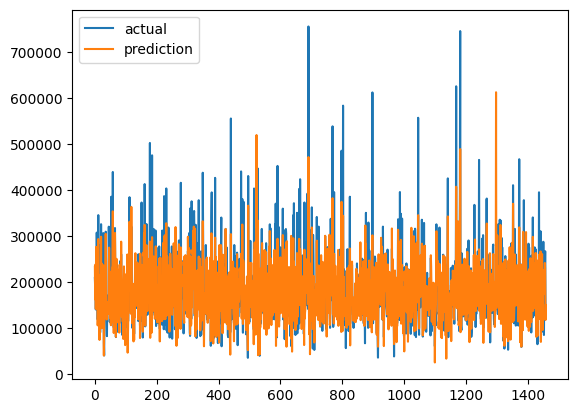

In [14]:
plt.plot(Y, label="actual")
plt.plot(pred, label="prediction")
plt.legend()
plt.show()

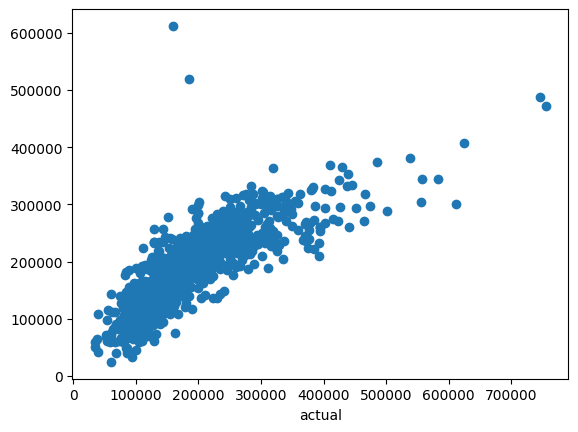

In [17]:
plt.scatter(Y, pred)
plt.xlabel("actual")
plt.xlabel("actual")
plt.show()

# [Problem 3] Comparison of methods

In [23]:
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

In [24]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=42, shuffle=True)

In [26]:
X_train

array([[1504, 2005],
       [1309, 1974],
       [1258, 1939],
       ...,
       [ 864, 1955],
       [1426, 1918],
       [1555, 2007]], dtype=int64)

In [28]:
# model training
reg_linear = LinearRegression().fit(X_train, Y_train)
reg_svr = SVR().fit(X_train, Y_train)
reg_dt = DecisionTreeRegressor().fit(X_train, Y_train)
reg_rf = RandomForestRegressor().fit(X_train, Y_train)

C:\Users\batmunkh.ERDENETMC\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\batmunkh.ERDENETMC\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


In [29]:
# model pred
pred_linear = reg_linear.predict(X_test)
pred_svr = reg_svr.predict(X_test)
pred_dt = reg_dt.predict(X_test)
pred_rf = reg_rf.predict(X_test)

In [31]:
# model eval
mse_score_linear = np.round(mean_squared_error(Y_test, pred_linear), 2)
print(f"linear regression MSE = {mse_score_linear}")

mse_score_svr = np.round(mean_squared_error(Y_test, pred_svr), 2)
print(f"SVR regression MSE = {mse_score_svr}")

mse_score_dt = np.round(mean_squared_error(Y_test, pred_dt), 2)
print(f"Decistion tree regression MSE = {mse_score_dt}")

mse_score_rf = np.round(mean_squared_error(Y_test, pred_rf), 2)
print(f"Random Forest regression MSE = {mse_score_rf}")

linear regression MSE = 2314465092.73
SVR regression MSE = 7171025750.7
Decistion tree regression MSE = 2358773122.96
Random Forest regression MSE = 1660351048.4


# [Problem 4] (Advance assignment) Learning using other features

In [32]:
cols = train_df.columns

In [34]:
cols = cols[1:-1]

In [35]:
cols

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'Wo

In [37]:
from sklearn.preprocessing import LabelEncoder

In [38]:
# categorical vars into numerical vars
for col in cols:
    if train_df[col].dtype == "object":
        enc = LabelEncoder().fit(train_df[col])
        train_df[col] = enc.transform(train_df[col])

In [39]:
reg_rf = RandomForestRegressor().fit(train_df[cols], train_df["SalePrice"])

In [42]:
df_feat_importance = pd.DataFrame()
df_feat_importance["columns"] = cols
df_feat_importance["importance"] = reg_rf.feature_importances_

In [44]:
df_feat_importance = df_feat_importance.sort_values(by="importance", ascending=False)
df_feat_importance

,columns,importance
16,OverallQual,5.879445e-01
45,GrLivArea,1.104184e-01
37,TotalBsmtSF,3.837342e-02
43,2ndFlrSF,3.442675e-02
33,BsmtFinSF1,2.751340e-02
...,...,...
38,Heating,6.010247e-05
44,LowQualFinSF,4.770679e-05
73,MiscFeature,3.109827e-05
4,Street,1.162585e-05


In [46]:
best_10_cols = df_feat_importance["columns"].iloc[:10].tolist()

In [47]:
best_10_cols

['OverallQual',
 'GrLivArea',
 'TotalBsmtSF',
 '2ndFlrSF',
 'BsmtFinSF1',
 '1stFlrSF',
 'GarageCars',
 'GarageArea',
 'LotArea',
 'YearBuilt']

In [48]:
X= train_df[best_10_cols].values
Y= train_df[["SalePrice"]].values
X.shape

(1460, 10)

In [49]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=42, shuffle=True)

In [50]:
reg_linear = LinearRegression().fit(X_train, Y_train)
reg_svr = SVR().fit(X_train, Y_train)
reg_dt = DecisionTreeRegressor().fit(X_train, Y_train)
reg_rf = RandomForestRegressor().fit(X_train, Y_train)

pred_linear = reg_linear.predict(X_test)
pred_svr = reg_svr.predict(X_test)
pred_dt = reg_dt.predict(X_test)
pred_rf = reg_rf.predict(X_test)

mse_score_linear = np.round(mean_squared_error(Y_test, pred_linear), 2)
print(f"linear regression MSE = {mse_score_linear}")

mse_score_svr = np.round(mean_squared_error(Y_test, pred_svr), 2)
print(f"SVR regression MSE = {mse_score_svr}")

mse_score_dt = np.round(mean_squared_error(Y_test, pred_dt), 2)
print(f"Decistion tree regression MSE = {mse_score_dt}")

mse_score_rf = np.round(mean_squared_error(Y_test, pred_rf), 2)
print(f"Random Forest regression MSE = {mse_score_rf}")

C:\Users\batmunkh.ERDENETMC\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\batmunkh.ERDENETMC\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\base.py:1474: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


linear regression MSE = 1357989299.88
SVR regression MSE = 7185118456.31
Decistion tree regression MSE = 1441373207.01
Random Forest regression MSE = 754709329.1
